# Trained Xception network on classification on cervix images

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Project
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname('.')), '..', 'common'))

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

def plt_st(n, m):
    plt.figure(figsize=(n, m))

In [5]:
os.environ['KERAS_BACKEND']='tensorflow'
# os.environ['CUDA_VISIBLE_DEVICES']='0'

In [6]:
from xception_keras202 import get_xception, get_xception_3_dense

Using TensorFlow backend.


In [7]:
lr_base = 0.001
optimizer = 'rmsprop'

print("\n {} - Get Xception model ...".format(datetime.now()))
xception = get_xception(trained=False, finetuning=False, optimizer=optimizer, lr=lr_base)


 2017-04-22 23:27:58.097148 - Get Xception model ...


In [8]:
xception.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 149, 149, 32)  864                                          
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, 149, 149, 32)  128                                          
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, 149, 149, 32)  0                                            
___________________________________________________________________________________________

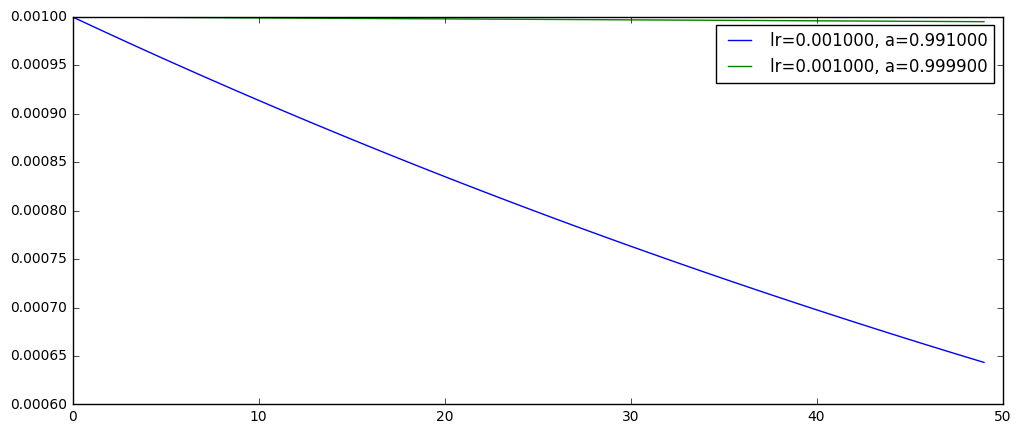

In [9]:
from training_utils import exp_decay

lr_1 = 1.0 * lr_base; a_1 = 0.991
lr_2 = 1.0 * lr_base; a_2 = 0.9999

epochs = np.arange(0, 50)
lrs_1 = exp_decay(epochs, lr=lr_1, a=a_1)
lrs_2 = exp_decay(epochs, lr=lr_2, a=a_2)
plt_st(12, 5)
plt.plot(epochs, lrs_1, label="lr=%f, a=%f" % (lr_1, a_1))
plt.plot(epochs, lrs_2, label="lr=%f, a=%f" % (lr_2, a_2))
plt.legend()

In [10]:
seed = 2017
np.random.seed(seed)
save_prefix='xception_norm2_cervix_opt=%s_seed=%i_lr=%.3f' % (optimizer, seed, lr_base) 

In [16]:
from training_utils import get_trainval_id_type_lists3

print("\n {} - Get train/val lists ...".format(datetime.now()))

n_images_per_class=700
train_id_type_list, val_id_type_list = get_trainval_id_type_lists3(n_images_per_class=n_images_per_class, val_split=0.15, seed=2017)
print(len(train_id_type_list), len(val_id_type_list))


 2017-04-22 23:37:32.198731 - Get train/val lists ...
1785 315


In [12]:
from glob import glob
from training_utils import find_best_weights_file

weights_files = glob("weights/%s*.h5" % save_prefix)
best_weights_filename, best_val_loss = find_best_weights_file(weights_files)
print("Best val loss weights: ", best_weights_filename)

if len(best_weights_filename) > 0:
    # load weights to the model
    print("Load found weights: ", best_weights_filename)
    xception.load_weights(best_weights_filename)

Best val loss weights:  


In [14]:
from xy_providers import DataCache
# cache = DataCache(0)

In [18]:
if True:
    from training_utils import classification_train as train
      
    nb_epochs = 50
    batch_size = 3
    
    lrate_decay_f = None # lambda epoch: exp_decay(epoch, lr=lr_1, a=a_1) 

    print("\n {} - Start training ...".format(datetime.now()))
    h = train(xception, 
              train_id_type_list, 
              val_id_type_list, 
              option='cervix',
              nb_epochs=nb_epochs,
              samples_per_epoch=1800,
              nb_val_samples=315,
              lrate_decay_f=lrate_decay_f,
              batch_size=batch_size, 
              xy_provider_cache=cache,
              seed=seed,
              save_prefix=save_prefix)


 2017-04-22 23:38:02.071089 - Start training ...

-- Training parameters: 3, 50, 1800, 315

-- Fit model
- New Keras API found -
Epoch 1/50
600/600 [==============================] - 1167s - loss: 1.1185 - acc: 0.3728 - val_loss: 2.7307 - val_acc: 0.3873
Epoch 2/50
600/600 [==============================] - 1042s - loss: 1.0723 - acc: 0.4467 - val_loss: 1.7520 - val_acc: 0.3587
Epoch 3/50
600/600 [==============================] - 1028s - loss: 1.0477 - acc: 0.4567 - val_loss: 1.3247 - val_acc: 0.3810
Epoch 4/50
600/600 [==============================] - 1020s - loss: 1.0472 - acc: 0.4678 - val_loss: 1.5331 - val_acc: 0.3778
Epoch 5/50
600/600 [==============================] - 1020s - loss: 1.0459 - acc: 0.4578 - val_loss: 1.3955 - val_acc: 0.4032
Epoch 6/50
600/600 [==============================] - 1020s - loss: 1.0320 - acc: 0.4711 - val_loss: 1.5117 - val_acc: 0.4000
Epoch 7/50
600/600 [==============================] - 1020s - loss: 1.0167 - acc: 0.4811 - val_loss: 1.4721 - val_

In [14]:
# weights_filename = os.path.join("weights", save_prefix + "_{epoch:02d}-{val_loss:.4f}.h5")
# weights_filename = weights_filename.format(epoch=50, val_loss=0.9954)
# xception.save_weights(weights_filename)


In [20]:
from training_utils import classification_validate as validate
from test_utils import classification_predict as predict

batch_size = 8

In [22]:
print("\n {} - Start validation ...".format(datetime.now()))
validate(xception, val_id_type_list, save_prefix=save_prefix, batch_size=batch_size, xy_provider_cache=cache)


 2017-04-22 21:47:48.939198 - Start validation ...
-- 8 batch loss :  0.945866  | info: [('1857', 'AType_2') ('6373', 'AType_1') ('4437', 'AType_3')
 ('4487', 'AType_3') ('1710', 'AType_2') ('6624', 'AType_1')
 ('4384', 'AType_3') ('175', 'AType_2')]
-- 16 batch loss :  0.986892  | info: [('635', 'AType_1') ('4574', 'AType_3') ('4452', 'AType_3')
 ('1934', 'AType_2') ('179', 'AType_2') ('6189', 'AType_1')
 ('1783', 'AType_2') ('860', 'AType_1')]
-- 24 batch loss :  1.212  | info: [('4456', 'AType_3') ('468', 'AType_3') ('1887', 'AType_2')
 ('1840', 'AType_2') ('6130', 'AType_1') ('4768', 'AType_3')
 ('6416', 'AType_1') ('451', 'AType_3')]
-- 32 batch loss :  1.444  | info: [('6242', 'AType_1') ('1752', 'AType_2') ('6129', 'AType_1')
 ('6504', 'AType_1') ('823', 'AType_1') ('718', 'AType_1')
 ('185', 'AType_2') ('1900', 'AType_2')]
-- 40 batch loss :  2.64837  | info: [('1759', 'AType_2') ('1817', 'AType_2') ('737', 'AType_1')
 ('6461', 'AType_1') ('1884', 'AType_2') ('1903', 'AType_2'

In [25]:
print("\n {} - Start predictions and write submission ...".format(datetime.now()))
from test_utils import get_test_id_type_list
test_id_type_list = get_test_id_type_list()
predict(xception, test_id_type_list, save_prefix=save_prefix, info=save_prefix, batch_size=batch_size)


 2017-04-10 18:42:19.416185 - Start predictions and write submission ...
Load existing file: /Users/vfomin/Documents/ML/Kaggle/Intel_MobileODT/input/generated/xception_trained_3_dense_norm_cervix_adadelta_seed=2017_stats.npz
-- 0 / 512
-- 4 / 512
-- 8 / 512
-- 12 / 512
-- 16 / 512
-- 20 / 512
-- 24 / 512
-- 28 / 512
-- 32 / 512
-- 36 / 512
-- 40 / 512
-- 44 / 512
-- 48 / 512
-- 52 / 512
-- 56 / 512
-- 60 / 512
-- 64 / 512
-- 68 / 512
-- 72 / 512
-- 76 / 512
-- 80 / 512
-- 84 / 512
-- 88 / 512
-- 92 / 512
-- 96 / 512
-- 100 / 512
-- 104 / 512
-- 108 / 512
-- 112 / 512
-- 116 / 512
-- 120 / 512
-- 124 / 512
-- 128 / 512
-- 132 / 512
-- 136 / 512
-- 140 / 512
-- 144 / 512
-- 148 / 512
-- 152 / 512
-- 156 / 512
-- 160 / 512
-- 164 / 512
-- 168 / 512
-- 172 / 512
-- 176 / 512
-- 180 / 512
-- 184 / 512
-- 188 / 512
-- 192 / 512
-- 196 / 512
-- 200 / 512
-- 204 / 512
-- 208 / 512
-- 212 / 512
-- 216 / 512
-- 220 / 512
-- 224 / 512
-- 228 / 512
-- 232 / 512
-- 236 / 512
-- 240 / 512
-- 244 / 

## Analyse predictions

In [16]:
batch_size = 4
from data_utils import GENERATED_DATA
from xy_providers import cached_image_label_provider
from preprocessing.image.generators import ImageDataGenerator

normalize_data = True
image_size = (299, 299)
channels_first = False

xy_provider = cached_image_label_provider
val_gen = ImageDataGenerator(featurewise_center=normalize_data,
                             featurewise_std_normalization=normalize_data)

if normalize_data:
    if False:
        assert len(save_prefix) > 0, "WTF"
        # Load mean, std, principal_components if file exists
        filename = os.path.join(GENERATED_DATA, save_prefix + "_stats.npz")
        assert os.path.exists(filename), "WTF"
        print("Load existing file: %s" % filename)
        npzfile = np.load(filename)
        val_gen.mean = npzfile['mean']
        val_gen.std = npzfile['std']
    else:
        val_gen.mean = 0.5
        val_gen.std = 0.5
        
        
        
flow = val_gen.flow(xy_provider(val_id_type_list,
                                image_size=image_size,
                                option='cervix',
                                channels_first=channels_first,
                                cache=cache,
                                test_mode=True),
                    # Ensure that all batches have the same size
                    len(val_id_type_list),
                    batch_size=batch_size)
total_counter = 0

-- 8
('1710', 'AType_2') [ 0.90960824  0.07514144  0.03147152] [0 1 0]
('6624', 'AType_1') [  9.99998689e-01   4.71193289e-07   8.72203145e-06] [1 0 0]
('4384', 'AType_3') [ 0.17130294  0.25800005  0.55176288] [0 0 1]
('175', 'AType_2') [ 0.27710709  0.42661506  0.30955243] [0 1 0]


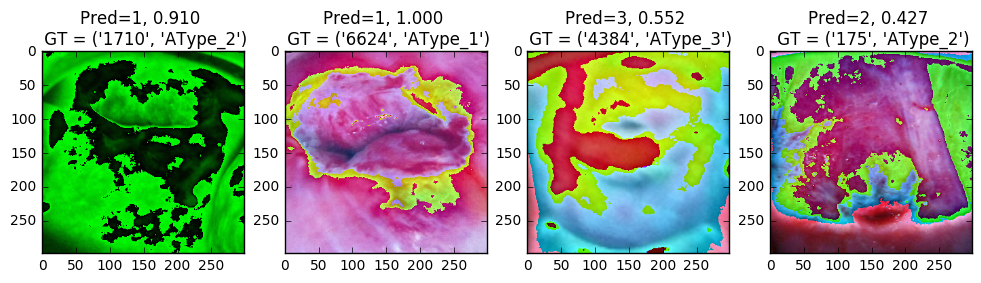

In [18]:
for x, y_true, info in flow:
    s = y_true.shape[0]
    y_pred = xception.predict(x)
    print("--", total_counter*batch_size + s)    
    total_counter += 1
    plt_st(12, 4)
    for i in range(s):
        print(info[i], y_pred[i], y_true[i])
        plt.subplot(1, s, i+1)
        plt.title("Pred={}, {:.3f} \n GT = {}".format(np.argmax(y_pred[i])+1, np.max(y_pred[i]), info[i]))
        plt.imshow(x[i, :, :, :])
    break

### Logs


binary_crossentropy, sigmoid
```
 2017-04-22 12:35:37.968998 - Start training ...

-- Training parameters: 3, 50, 3600, 630

-- Fit model
- New Keras API found -
Epoch 1/50
1200/1200 [] - 2414s - loss: 0.6695 - acc: 0.6410 - val_loss: 0.6523 - val_acc: 0.6767
Epoch 2/50
1200/1200 [] - 2140s - loss: 0.6480 - acc: 0.6541 - val_loss: 1.8742 - val_acc: 0.5550
Epoch 3/50
1200/1200 [] - 2140s - loss: 0.6451 - acc: 0.6634 - val_loss: 0.6288 - val_acc: 0.6714
Epoch 4/50
1200/1200 [] - 2140s - loss: 0.6438 - acc: 0.6630 - val_loss: 0.6409 - val_acc: 0.6667
Epoch 5/50
1200/1200 [] - 2140s - loss: 0.6416 - acc: 0.6617 - val_loss: 0.6837 - val_acc: 0.6291
Epoch 6/50
1200/1200 [] - 2141s - loss: 0.6357 - acc: 0.6624 - val_loss: 0.6063 - val_acc: 0.6831
Epoch 7/50
1200/1200 [] - 2175s - loss: 0.6332 - acc: 0.6591 - val_loss: 0.6069 - val_acc: 0.6847
Epoch 8/50
1200/1200 [] - 2156s - loss: 0.6317 - acc: 0.6631 - val_loss: 0.6831 - val_acc: 0.6423
Epoch 9/50
1200/1200 [] - 2141s - loss: 0.6243 - acc: 0.6656 - val_loss: 0.5970 - val_acc: 0.6868
Epoch 10/50
1200/1200 [] - 2139s - loss: 0.6245 - acc: 0.6694 - val_loss: 0.7695 - val_acc: 0.7148
Epoch 11/50
1200/1200 [] - 2140s - loss: 0.6241 - acc: 0.6686 - val_loss: 0.6378 - val_acc: 0.6968
Epoch 12/50
1200/1200 [] - 2140s - loss: 0.6267 - acc: 0.6664 - val_loss: 0.5882 - val_acc: 0.7164
Epoch 13/50
1200/1200 [] - 2139s - loss: 0.6184 - acc: 0.6665 - val_loss: 0.5720 - val_acc: 0.7317
Epoch 14/50
1200/1200 [] - 2135s - loss: 0.6114 - acc: 0.6737 - val_loss: 0.8824 - val_acc: 0.7217
Epoch 15/50
1200/1200 [] - 2136s - loss: 0.6096 - acc: 0.6747 - val_loss: 1.0615 - val_acc: 0.7312
```



```
2017-04-21 00:51:25.046532 - Start training ...

-- Training parameters: 3, 50, 2046, 510

-- Fit model
- New Keras API found -
Epoch 1/50
682/682 [] - 1471s - loss: 1.2013 - acc: 0.3451 - val_loss: 1.1495 - val_acc: 0.3294
Epoch 2/50
682/682 [] - 1304s - loss: 1.1383 - acc: 0.3407 - val_loss: 1.1399 - val_acc: 0.3529
Epoch 3/50
682/682 [] - 1245s - loss: 1.1503 - acc: 0.3524 - val_loss: 1.2095 - val_acc: 0.3647
Epoch 4/50
682/682 [] - 1246s - loss: 1.1268 - acc: 0.3328 - val_loss: 1.1212 - val_acc: 0.3549
Epoch 5/50
682/682 [] - 1246s - loss: 1.1256 - acc: 0.3407 - val_loss: 1.1322 - val_acc: 0.3902
Epoch 6/50
682/682 [] - 1245s - loss: 1.1365 - acc: 0.3324 - val_loss: 1.1363 - val_acc: 0.3216
Epoch 7/50
682/682 [] - 1246s - loss: 1.1194 - acc: 0.3490 - val_loss: 1.1737 - val_acc: 0.3353
Epoch 8/50
682/682 [] - 1245s - loss: 1.1294 - acc: 0.3382 - val_loss: 1.1378 - val_acc: 0.3431
Epoch 9/50
682/682 [] - 1245s - loss: 1.1182 - acc: 0.3680 - val_loss: 1.1181 - val_acc: 0.3647
Epoch 10/50
682/682 [] - 1242s - loss: 1.1279 - acc: 0.3319 - val_loss: 1.1666 - val_acc: 0.3353
Epoch 11/50
682/682 [] - 1242s - loss: 1.1185 - acc: 0.3534 - val_loss: 1.0994 - val_acc: 0.4039
Epoch 12/50
682/682 [] - 1242s - loss: 1.1183 - acc: 0.3656 - val_loss: 1.0780 - val_acc: 0.4137
Epoch 13/50
682/682 [] - 1243s - loss: 1.1169 - acc: 0.3636 - val_loss: 1.1307 - val_acc: 0.3667
Epoch 14/50
682/682 [] - 1243s - loss: 1.1077 - acc: 0.3847 - val_loss: 1.0464 - val_acc: 0.4627
Epoch 15/50
682/682 [] - 1243s - loss: 1.1062 - acc: 0.3891 - val_loss: 1.0203 - val_acc: 0.4510
Epoch 16/50
682/682 [] - 1243s - loss: 1.1043 - acc: 0.3969 - val_loss: 1.8170 - val_acc: 0.3686
Epoch 17/50
682/682 [] - 1242s - loss: 1.1084 - acc: 0.3983 - val_loss: 1.0346 - val_acc: 0.4412
Epoch 18/50
682/682 [] - 1243s - loss: 1.0895 - acc: 0.4081 - val_loss: 1.0317 - val_acc: 0.4608
Epoch 19/50
682/682 [] - 1243s - loss: 1.0782 - acc: 0.4140 - val_loss: 1.0811 - val_acc: 0.4824
Epoch 20/50
682/682 [] - 1242s - loss: 1.0798 - acc: 0.4203 - val_loss: 1.0076 - val_acc: 0.4882
Epoch 21/50
682/682 [] - 1244s - loss: 1.0818 - acc: 0.4091 - val_loss: 0.9899 - val_acc: 0.5118
Epoch 22/50
682/682 [] - 1281s - loss: 1.0828 - acc: 0.4213 - val_loss: 1.0842 - val_acc: 0.5196
Epoch 23/50
682/682 [] - 1286s - loss: 1.0712 - acc: 0.4076 - val_loss: 1.1304 - val_acc: 0.4588
Epoch 24/50
682/682 [] - 1247s - loss: 1.0759 - acc: 0.4291 - val_loss: 1.0626 - val_acc: 0.4804
Epoch 25/50
682/682 [] - 1247s - loss: 1.0669 - acc: 0.4296 - val_loss: 1.0002 - val_acc: 0.4941
Epoch 26/50
682/682 [] - 1247s - loss: 1.0632 - acc: 0.4311 - val_loss: 1.1299 - val_acc: 0.5020
Epoch 27/50
682/682 [] - 1246s - loss: 1.0637 - acc: 0.4433 - val_loss: 1.0227 - val_acc: 0.5098
Epoch 28/50
682/682 [] - 1247s - loss: 1.0545 - acc: 0.4404 - val_loss: 0.9565 - val_acc: 0.5941
Epoch 29/50
682/682 [] - 1248s - loss: 1.0541 - acc: 0.4433 - val_loss: 1.0777 - val_acc: 0.5392
Epoch 30/50
682/682 [] - 1247s - loss: 1.0539 - acc: 0.4443 - val_loss: 1.1214 - val_acc: 0.5157
Epoch 31/50
682/682 [] - 1247s - loss: 1.0557 - acc: 0.4374 - val_loss: 1.0999 - val_acc: 0.5431
Epoch 32/50
682/682 [] - 1244s - loss: 1.0387 - acc: 0.4457 - val_loss: 1.0049 - val_acc: 0.5686
Epoch 33/50
682/682 [] - 1243s - loss: 1.0223 - acc: 0.4804 - val_loss: 1.0857 - val_acc: 0.5196
Epoch 34/50
682/682 [] - 1242s - loss: 1.0258 - acc: 0.4804 - val_loss: 1.0443 - val_acc: 0.5235
Epoch 35/50
682/682 [] - 1242s - loss: 1.0246 - acc: 0.4746 - val_loss: 0.9767 - val_acc: 0.5667
Epoch 36/50
682/682 [] - 1243s - loss: 1.0170 - acc: 0.4936 - val_loss: 0.8988 - val_acc: 0.6000
Epoch 37/50
682/682 [] - 1243s - loss: 1.0069 - acc: 0.4956 - val_loss: 1.0552 - val_acc: 0.5922
Epoch 38/50
682/682 [] - 1243s - loss: 0.9983 - acc: 0.5010 - val_loss: 0.9876 - val_acc: 0.5510
Epoch 39/50
682/682 [] - 1243s - loss: 0.9960 - acc: 0.5078 - val_loss: 1.0090 - val_acc: 0.5922
Epoch 40/50
682/682 [] - 1243s - loss: 0.9762 - acc: 0.5308 - val_loss: 0.9739 - val_acc: 0.5745
Epoch 41/50
682/682 [] - 1242s - loss: 0.9995 - acc: 0.4951 - val_loss: 0.9260 - val_acc: 0.5627
Epoch 42/50
682/682 [] - 1242s - loss: 0.9817 - acc: 0.5191 - val_loss: 0.9075 - val_acc: 0.5725
Epoch 43/50
682/682 [] - 1243s - loss: 0.9761 - acc: 0.5176 - val_loss: 0.8850 - val_acc: 0.5824
Epoch 44/50
682/682 [] - 1243s - loss: 0.9635 - acc: 0.5342 - val_loss: 0.9249 - val_acc: 0.5804
Epoch 45/50
682/682 [] - 1242s - loss: 0.9786 - acc: 0.5122 - val_loss: 1.0006 - val_acc: 0.5549
Epoch 46/50
682/682 [] - 1242s - loss: 0.9648 - acc: 0.5308 - val_loss: 0.8688 - val_acc: 0.6039
Epoch 47/50
682/682 [] - 1243s - loss: 0.9433 - acc: 0.5455 - val_loss: 0.9146 - val_acc: 0.5863
Epoch 48/50
682/682 [] - 1242s - loss: 0.9695 - acc: 0.5283 - val_loss: 1.0150 - val_acc: 0.5373
Epoch 49/50
682/682 [] - 1242s - loss: 0.9565 - acc: 0.5357 - val_loss: 0.8742 - val_acc: 0.5882
Epoch 50/50
682/682 [] - 1242s - loss: 0.9499 - acc: 0.5318 - val_loss: 0.9125 - val_acc: 0.5471

```



xception_norm2_cervix_opt=adam_seed=2017_lr=0.010_a=0.991
Trained, not finetunning

```
2017-04-20 20:48:42.178566 - Start training ...

-- Training parameters: 3, 50, 2046, 510

-- Fit model
- New Keras API found -
Epoch 1/50
682/682 [] - 1436s - loss: 1.3180 - acc: 0.3446 - val_loss: 1.1743 - val_acc: 0.3020
Epoch 2/50
682/682 [] - 1293s - loss: 1.2560 - acc: 0.3177 - val_loss: 2.0991 - val_acc: 0.3490
Epoch 3/50
682/682 [] - 1215s - loss: 1.1635 - acc: 0.3377 - val_loss: 1.1035 - val_acc: 0.3373
Epoch 4/50
682/682 [] - 1228s - loss: 1.1437 - acc: 0.3284 - val_loss: 1.1232 - val_acc: 0.3275
Epoch 5/50
682/682 [] - 1323s - loss: 1.1249 - acc: 0.3294 - val_loss: 1.1077 - val_acc: 0.3255
Epoch 6/50
682/682 [] - 1297s - loss: 1.1164 - acc: 0.3500 - val_loss: 1.1661 - val_acc: 0.2882
Epoch 7/50
682/682 [] - 1294s - loss: 1.1079 - acc: 0.3641 - val_loss: 2.1556 - val_acc: 0.3980
Epoch 8/50
682/682 [] - 1329s - loss: 1.0989 - acc: 0.3744 - val_loss: 1.1805 - val_acc: 0.4569
Epoch 9/50
682/682 [] - 1249s - loss: 1.1096 - acc: 0.3646 - val_loss: 1.0664 - val_acc: 0.4314
Epoch 10/50
682/682 [] - 1242s - loss: 1.1089 - acc: 0.3661 - val_loss: 1.1238 - val_acc: 0.3137
Epoch 11/50
239/682 [=========>....................] - ETA: 773s - loss: 1.1293 - acc: 0.3264

```



xception_trained_3_dense_norm_cervix_adadelta_seed=2017

```
2017-04-10 08:19:13.163710 - Start training ...

-- Training parameters: 8, 50, 2048, 1024

-- Fit stats of train dataset
Load existing file: /Users/vfomin/Documents/ML/Kaggle/Intel_MobileODT/input/generated/xception_trained_3_dense_norm_cervix_adadelta_seed=2017_stats.npz
No need to recompute statistics

-- Fit model
- New Keras API found -
Epoch 1/50
256/256 [] - 556s - loss: 1.1825 - acc: 0.3726 - val_loss: 1.0385 - val_acc: 0.4961
Epoch 2/50
256/256 [] - 553s - loss: 1.0914 - acc: 0.4033 - val_loss: 0.9926 - val_acc: 0.5303
Epoch 3/50
256/256 [] - 553s - loss: 1.0382 - acc: 0.4731 - val_loss: 0.9482 - val_acc: 0.5234
Epoch 4/50
256/256 [] - 553s - loss: 0.9950 - acc: 0.4995 - val_loss: 0.9174 - val_acc: 0.5166
Epoch 5/50
256/256 [] - 552s - loss: 0.9920 - acc: 0.4951 - val_loss: 0.9064 - val_acc: 0.5439
Epoch 6/50
256/256 [] - 552s - loss: 0.9546 - acc: 0.5234 - val_loss: 0.8897 - val_acc: 0.5684
Epoch 7/50
256/256 [] - 552s - loss: 0.9595 - acc: 0.5293 - val_loss: 0.8812 - val_acc: 0.5566
Epoch 8/50
256/256 [] - 552s - loss: 0.9258 - acc: 0.5493 - val_loss: 0.9145 - val_acc: 0.5596
Epoch 9/50
256/256 [] - 552s - loss: 0.9310 - acc: 0.5591 - val_loss: 0.8834 - val_acc: 0.5596
Epoch 10/50
256/256 [] - 552s - loss: 0.9156 - acc: 0.5698 - val_loss: 0.8955 - val_acc: 0.5449
Epoch 11/50
256/256 [] - 552s - loss: 0.8982 - acc: 0.5835 - val_loss: 0.8951 - val_acc: 0.5791
Epoch 12/50
256/256 [] - 552s - loss: 0.9094 - acc: 0.5703 - val_loss: 0.8842 - val_acc: 0.5674
Epoch 13/50
256/256 [] - 552s - loss: 0.8871 - acc: 0.5840 - val_loss: 0.8860 - val_acc: 0.5654
Epoch 14/50
256/256 [] - 552s - loss: 0.9042 - acc: 0.5757 - val_loss: 0.9130 - val_acc: 0.5625
Epoch 15/50
256/256 [] - 552s - loss: 0.9078 - acc: 0.5708 - val_loss: 0.8937 - val_acc: 0.5713
Epoch 16/50
256/256 [] - 552s - loss: 0.8833 - acc: 0.5908 - val_loss: 0.8916 - val_acc: 0.5752
Epoch 17/50
256/256 [] - 552s - loss: 0.8741 - acc: 0.5977 - val_loss: 0.8919 - val_acc: 0.5879
Epoch 18/50
256/256 [] - 552s - loss: 0.8478 - acc: 0.6050 - val_loss: 0.9156 - val_acc: 0.5908
Epoch 19/50
256/256 [] - 552s - loss: 0.8587 - acc: 0.6030 - val_loss: 0.8996 - val_acc: 0.5752
Epoch 20/50
256/256 [] - 552s - loss: 0.8469 - acc: 0.6035 - val_loss: 0.9111 - val_acc: 0.5840
Epoch 21/50
256/256 [] - 551s - loss: 0.8540 - acc: 0.5879 - val_loss: 0.9184 - val_acc: 0.5830
Epoch 22/50
256/256 [] - 551s - loss: 0.8619 - acc: 0.5977 - val_loss: 0.9027 - val_acc: 0.5801
Epoch 23/50
256/256 [] - 551s - loss: 0.8428 - acc: 0.6079 - val_loss: 0.8925 - val_acc: 0.5830
Epoch 24/50
256/256 [] - 551s - loss: 0.8334 - acc: 0.6260 - val_loss: 0.9472 - val_acc: 0.5742
Epoch 25/50
256/256 [] - 551s - loss: 0.8232 - acc: 0.6211 - val_loss: 0.8903 - val_acc: 0.5967
Epoch 26/50
256/256 [] - 551s - loss: 0.8179 - acc: 0.6084 - val_loss: 0.9258 - val_acc: 0.5938
Epoch 27/50
256/256 [] - 551s - loss: 0.8404 - acc: 0.6157 - val_loss: 0.9566 - val_acc: 0.5781
Epoch 28/50
256/256 [] - 550s - loss: 0.8354 - acc: 0.6094 - val_loss: 0.9439 - val_acc: 0.5732
Epoch 29/50
256/256 [] - 550s - loss: 0.8341 - acc: 0.6309 - val_loss: 0.9647 - val_acc: 0.5957
Epoch 30/50
256/256 [] - 551s - loss: 0.8031 - acc: 0.6558 - val_loss: 0.9930 - val_acc: 0.5645
Epoch 31/50
256/256 [] - 551s - loss: 0.8363 - acc: 0.6235 - val_loss: 0.9227 - val_acc: 0.5947
Epoch 32/50
256/256 [] - 551s - loss: 0.8210 - acc: 0.6343 - val_loss: 0.9791 - val_acc: 0.5596
Epoch 33/50
256/256 [] - 550s - loss: 0.8151 - acc: 0.6206 - val_loss: 1.0454 - val_acc: 0.5420
Epoch 34/50
256/256 [] - 550s - loss: 0.8081 - acc: 0.6367 - val_loss: 0.9620 - val_acc: 0.5762
Epoch 35/50
256/256 [] - 551s - loss: 0.7813 - acc: 0.6538 - val_loss: 0.9378 - val_acc: 0.5977
Epoch 36/50
256/256 [] - 551s - loss: 0.8218 - acc: 0.6348 - val_loss: 0.9448 - val_acc: 0.5869
Epoch 37/50
256/256 [] - 551s - loss: 0.7898 - acc: 0.6465 - val_loss: 0.9622 - val_acc: 0.5947
Epoch 38/50
256/256 [] - 551s - loss: 0.7796 - acc: 0.6455 - val_loss: 0.9754 - val_acc: 0.5713
Epoch 39/50
256/256 [] - 551s - loss: 0.8165 - acc: 0.6401 - val_loss: 0.9620 - val_acc: 0.5703
Epoch 40/50
256/256 [] - 551s - loss: 0.7685 - acc: 0.6509 - val_loss: 1.0134 - val_acc: 0.5723
Epoch 41/50
256/256 [] - 551s - loss: 0.7765 - acc: 0.6592 - val_loss: 1.0378 - val_acc: 0.5791
Epoch 42/50
256/256 [] - 550s - loss: 0.7917 - acc: 0.6509 - val_loss: 1.0217 - val_acc: 0.5752
Epoch 43/50
256/256 [] - 550s - loss: 0.7902 - acc: 0.6426 - val_loss: 0.9581 - val_acc: 0.5830
Epoch 44/50
256/256 [] - 550s - loss: 0.7815 - acc: 0.6475 - val_loss: 0.9723 - val_acc: 0.5801
Epoch 45/50
256/256 [] - 550s - loss: 0.7825 - acc: 0.6504 - val_loss: 1.0255 - val_acc: 0.5918
Epoch 46/50
256/256 [] - 550s - loss: 0.7727 - acc: 0.6738 - val_loss: 1.0284 - val_acc: 0.5811
Epoch 47/50
256/256 [] - 551s - loss: 0.7582 - acc: 0.6826 - val_loss: 1.0273 - val_acc: 0.5723
Epoch 48/50
256/256 [] - 551s - loss: 0.7726 - acc: 0.6597 - val_loss: 1.0362 - val_acc: 0.5859
Epoch 49/50
256/256 [] - 551s - loss: 0.7416 - acc: 0.6699 - val_loss: 1.0400 - val_acc: 0.5801
Epoch 50/50
256/256 [] - 551s - loss: 0.8061 - acc: 0.6631 - val_loss: 0.9954 - val_acc: 0.5820
```


Shuffled data, val_split=0.2
Train ending blocks

```
 2017-04-09 23:18:02.045700 - Start training ...

-- Training parameters: 8, 50, 2048, 1024

-- Fit stats of train dataset
Load existing file: /Users/vfomin/Documents/ML/Kaggle/Intel_MobileODT/input/generated/xception_trained_original_norm_cervix_adadelta_seed=2017_stats.npz
No need to recompute statistics

-- Fit model
- New Keras API found -
Epoch 1/50
256/256 [] - 628s - loss: 0.8440 - acc: 0.6152 - val_loss: 0.9302 - val_acc: 0.6084
Epoch 2/50
256/256 [] - 621s - loss: 0.7636 - acc: 0.6450 - val_loss: 1.0905 - val_acc: 0.5918
Epoch 3/50
256/256 [] - 592s - loss: 0.7233 - acc: 0.6802 - val_loss: 0.9233 - val_acc: 0.6084
Epoch 4/50
256/256 [] - 644s - loss: 0.7026 - acc: 0.6802 - val_loss: 1.0360 - val_acc: 0.6152
Epoch 5/50
256/256 [] - 659s - loss: 0.6462 - acc: 0.7207 - val_loss: 1.1449 - val_acc: 0.5869
Epoch 6/50
256/256 [] - 660s - loss: 0.6173 - acc: 0.7329 - val_loss: 1.0263 - val_acc: 0.5967
Epoch 7/50
256/256 [] - 638s - loss: 0.5828 - acc: 0.7578 - val_loss: 1.0891 - val_acc: 0.6162
Epoch 8/50
256/256 [] - 616s - loss: 0.5522 - acc: 0.7632 - val_loss: 1.1607 - val_acc: 0.6143
Epoch 9/50
256/256 [] - 661s - loss: 0.5296 - acc: 0.7793 - val_loss: 1.3640 - val_acc: 0.5850
Epoch 10/50
256/256 [] - 637s - loss: 0.4891 - acc: 0.7949 - val_loss: 1.2968 - val_acc: 0.5723
Epoch 11/50
256/256 [] - 664s - loss: 0.4715 - acc: 0.8047 - val_loss: 1.3433 - val_acc: 0.6182
Epoch 12/50
256/256 [] - 626s - loss: 0.4617 - acc: 0.8032 - val_loss: 1.2871 - val_acc: 0.5889
```


Shuffled data, val_split=0.2
```
 2017-04-09 21:59:45.992259 - Start training ...

-- Training parameters: 8, 50, 2048, 1024

-- Fit stats of train dataset
Load existing file: /Users/vfomin/Documents/ML/Kaggle/Intel_MobileODT/input/generated/xception_trained_original_norm_cervix_adadelta_seed=2017_stats.npz
No need to recompute statistics

-- Fit model
- New Keras API found -
Epoch 1/50
256/256 [] - 597s - loss: 0.3834 - acc: 0.8442 - val_loss: 1.1990 - val_acc: 0.5430
Epoch 2/50
256/256 [] - 593s - loss: 0.7423 - acc: 0.6826 - val_loss: 1.1388 - val_acc: 0.5703
Epoch 3/50
256/256 [] - 613s - loss: 0.6842 - acc: 0.6899 - val_loss: 1.0178 - val_acc: 0.5869
Epoch 4/50
256/256 [] - 621s - loss: 0.6442 - acc: 0.7280 - val_loss: 1.1309 - val_acc: 0.5840
Epoch 5/50
256/256 [] - 607s - loss: 0.5886 - acc: 0.7427 - val_loss: 1.0864 - val_acc: 0.5996
Epoch 6/50
256/256 [] - 614s - loss: 0.5459 - acc: 0.7744 - val_loss: 1.2858 - val_acc: 0.5889
Epoch 7/50
 99/256 [==========>...................] - ETA: 261s - loss: 0.5064 - acc: 0.7955
```


```

 2017-04-09 00:37:21.308172 - Start training ...
-- Training parameters:  4 50 2048 1024
-- Fit stats of train dataset
Load existing file: /Users/vfomin/Documents/ML/Kaggle/Intel_MobileODT/input/generated/xception_trained_original_cervix_adadelta_seed=2017_stats.npz
No need to recompute statistics
-- Fit model
Epoch 1/50

/Users/vfomin/Documents/ML/Kaggle/Intel_MobileODT/notebooks/../common/training_utils.py:362: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<preproces..., validation_data=<preproces..., validation_steps=1024, verbose=1, callbacks=[<keras.ca..., steps_per_epoch=512, epochs=50)`
  verbose=verbose,

512/512 [] - 4901s - loss: 0.9079 - acc: 0.5708 - val_loss: 0.9943 - val_acc: 0.6138
Epoch 2/50
512/512 [] - 4824s - loss: 0.7831 - acc: 0.6353 - val_loss: 1.2298 - val_acc: 0.5715
Epoch 3/50
512/512 [] - 4795s - loss: 0.7184 - acc: 0.6934 - val_loss: 1.2304 - val_acc: 0.5708
Epoch 4/50
512/512 [] - 4789s - loss: 0.6684 - acc: 0.7104 - val_loss: 1.0132 - val_acc: 0.6167
Epoch 5/50
512/512 [] - 4787s - loss: 0.6031 - acc: 0.7422 - val_loss: 1.2270 - val_acc: 0.6145
Epoch 6/50
512/512 [] - 4790s - loss: 0.5373 - acc: 0.7817 - val_loss: 1.2280 - val_acc: 0.6138
Epoch 7/50
512/512 [] - 4792s - loss: 0.4819 - acc: 0.7993 - val_loss: 1.2862 - val_acc: 0.6353
Epoch 8/50
512/512 [] - 4813s - loss: 0.4059 - acc: 0.8340 - val_loss: 1.9449 - val_acc: 0.6121
```